### Task 5: Decision Tree on Titanic Dataset
Load Titanic dataset (or use a similar dataset).

● Preprocess (handle missing values, encode categorical variables).

● Train a DecisionTreeClassifier.

● Visualize the decision tree using plot_tree.

● Evaluate the model using accuracy and confusion matrix.

In [2]:
# Load data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

data['Age'] = data['Age'].fillna(data['Age'].median())
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


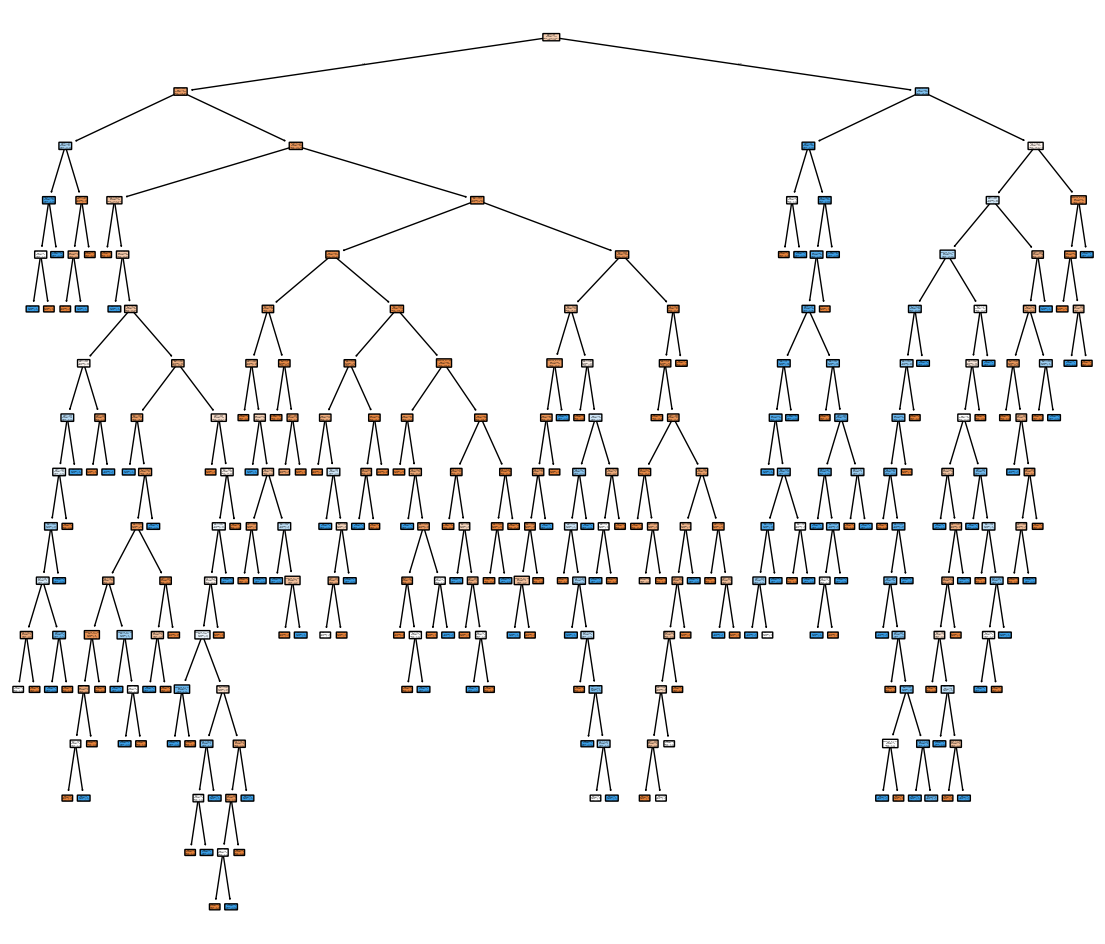

In [7]:
# Train model

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

plt.figure(figsize=(14,12))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'], rounded=True)
plt.show()


In [8]:
# Prediction and Evaluation

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.770949720670391
Confusion Matrix:
 [[91 15]
 [26 47]]
